<a href="https://colab.research.google.com/github/selimunal/Pytorch/blob/main/Moores_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [ ]:
ls

moore.csv  sample_data/


In [ ]:
data=pd.read_csv("moore.csv",sep='\t',header=None)#.values

In [ ]:
data

,0,1,2,3,4,5
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
...,...,...,...,...,...,...
97,IBM z13,"3,990,000,000",2015,IBM,22 nm,678 mm²
98,IBM z13 Storage Controller,"7,100,000,000",2015,IBM,22 nm,678 mm²
99,Quad-core + GPU GT2 Core i7 Skylake K,"cca 1,750,000,000",2015,Intel,14 nm,122 mm²
100,SPARC M7,"10,000,000,000[37]",2015,Oracle,20 nm,NaN


In [ ]:
X=data[2].values
X.shape

(102,)

In [ ]:
X=data[2]
X.head(10)

0       1971
1       1972
2       1974
3       1974
4       1974
5    1974[7]
6       1975
7       1976
8       1976
9       1978
Name: 2, dtype: object

In [ ]:
def func(x):
  return x.split('[')[0]

In [ ]:
X=X.apply(lambda X:X.split('[')[0])
X.head(10)

0    1971
1    1972
2    1974
3    1974
4    1974
5    1974
6    1975
7    1976
8    1976
9    1978
Name: 2, dtype: object

In [ ]:
X.values
X.shape

(102,)

In [ ]:
Y=data[1]
Y.head(10)

0       2,300
1       3,500
2       4,500
3       4,100
4       5,000
5       8,000
6    3,510[8]
7       6,500
8       8,500
9      29,000
Name: 1, dtype: object

In [ ]:
Y=Y.apply(lambda Y:Y.split('[')[0])
Y.head(10)

0     2,300
1     3,500
2     4,500
3     4,100
4     5,000
5     8,000
6     3,510
7     6,500
8     8,500
9    29,000
Name: 1, dtype: object

In [ ]:
Y=Y.values
Y.shape

(102,)

In [ ]:
X

0      1971
1      1972
2      1974
3      1974
4      1974
       ... 
97     2015
98     2015
99     2015
100    2015
101    2016
Name: 2, Length: 102, dtype: object

In [ ]:
Y

array(['2,300', '3,500', '4,500', '4,100', '5,000', '8,000', '3,510',
       '6,500', '8,500', '29,000', '9,000', '29,000', '68,000', '11,500',
       '55,000', '134,000', '22,000', '190,000', '25,000', '275,000',
       '16,000', '30,000', '553,000', '180,000', '250,000', '300,000',
       '1,180,235', '35,000', '1,350,000', '3,100,000', '578,977',
       '5,500,000', '2,500,000', '4,300,000', '8,800,000', '7,500,000',
       '7,500,000', '21,300,000', '22,000,000', '111,000', '27,400,000',
       '9,500,000', '42,000,000', '21,000,000', '45,000,000',
       '220,000,000', '55,000,000', '105,900,000', '54,300,000',
       '410,000,000', '592,000,000', '112,000,000', '169,000,000',
       '228,000,000', '241,000,000', '291,000,000', '1,700,000,000',
       '184,000,000', '362,000,000', '463,000,000', '26,000,000',
       '169,000,000', '411,000,000', '789,000,000', '758,000,000',
       '47,000,000', '230,000,000', '731,000,000', '1,900,000,000',
       '904,000,000', '1,000,000,000', 

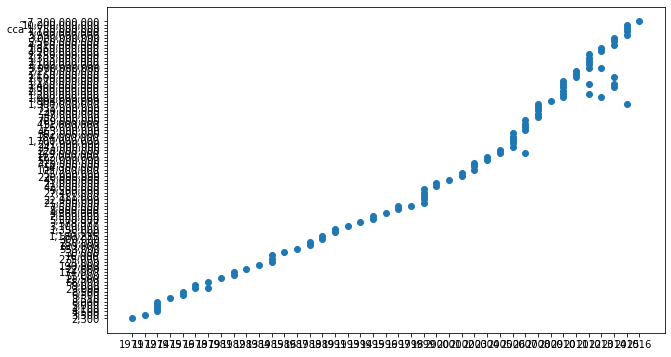

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y)

In [ ]:
X=X.values.reshape(-1,1)
Y=Y.reshape(-1,1)

In [ ]:
X.shape

(102, 1)

In [ ]:
Y.shape

(102, 1)

In [ ]:
X=X[:,0]

In [ ]:
Y=Y[:,0]


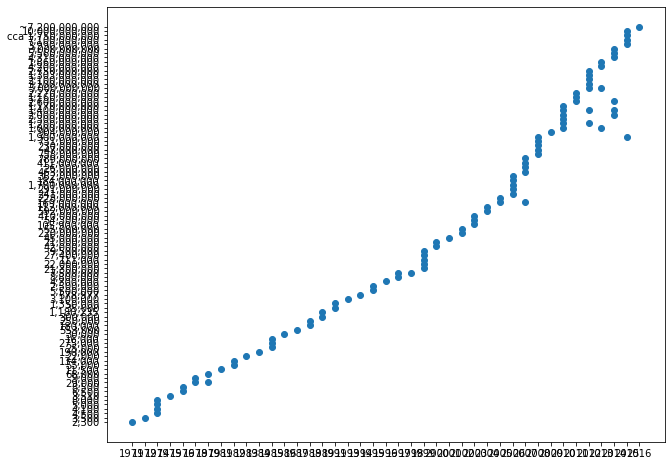

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X,Y)

In [ ]:
Y=Y.astype(str)

In [ ]:
replace_func = np.vectorize(lambda x: (x.replace(',','')))

In [ ]:
Y[99]='1,750,000,000'

In [ ]:
Y[101]='7,200,000,000'

In [ ]:
Y=replace_func(Y).astype(float)

In [ ]:
X=X.astype(float)

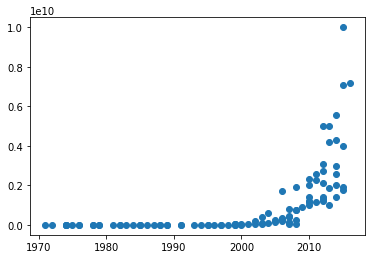

In [ ]:
plt.scatter(X,Y)

In [ ]:
Y=np.log(Y)

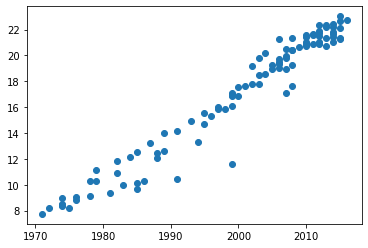

In [ ]:
plt.scatter(X,Y)

In [ ]:
#Preprocessing
mx=X.mean()
sx=X.std()
my=Y.mean()
sy=Y.std()

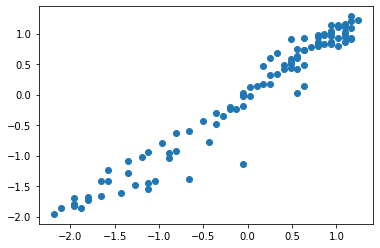

In [ ]:
X=(X-mx)/sx
Y=(Y-my)/sy
plt.scatter(X,Y)

In [ ]:
#Convert the data to float32
X=X.astype(np.float32)
Y=Y.astype(np.float32)

In [ ]:
X=X.reshape(-1,1)

In [ ]:
X.shape

(102, 1)

In [ ]:
Y=Y.reshape(-1,1)

In [ ]:
model=nn.Linear(1,1)

In [ ]:
#Convert the data to float32
X=X.astype(np.float32)
Y=Y.astype(np.float32)

In [ ]:
#LOSS AND OPTİMİZER
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.7)
inputs=torch.from_numpy(X)
targets=torch.from_numpy(Y)

In [ ]:
#TRAIN THE MODEL
n_epochs=100
losses=[]

for it in range(n_epochs):
  #zero the parameter gradients
  optimizer.zero_grad() #zero the parameter gradients
  #forward pass
  outputs=model(inputs) #forward pass  
  
  loss=criterion(outputs,targets)
  
  
  #record the loss
  losses.append(loss.item()) # record the loss
  
  #loss.requires_grad = True
  #loss.retain_grad()
  loss.backward() #backward and optimizer

  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs},Loss:{loss.item():.4f}')

Epoch 1/100,Loss:2.1542
Epoch 2/100,Loss:2.0707
Epoch 3/100,Loss:1.9343
Epoch 4/100,Loss:1.7688
Epoch 5/100,Loss:1.5916
Epoch 6/100,Loss:1.4145
Epoch 7/100,Loss:1.2452
Epoch 8/100,Loss:1.0882
Epoch 9/100,Loss:0.9457
Epoch 10/100,Loss:0.8186
Epoch 11/100,Loss:0.7065
Epoch 12/100,Loss:0.6087
Epoch 13/100,Loss:0.5239
Epoch 14/100,Loss:0.4510
Epoch 15/100,Loss:0.3885
Epoch 16/100,Loss:0.3352
Epoch 17/100,Loss:0.2899
Epoch 18/100,Loss:0.2515
Epoch 19/100,Loss:0.2190
Epoch 20/100,Loss:0.1915
Epoch 21/100,Loss:0.1684
Epoch 22/100,Loss:0.1489
Epoch 23/100,Loss:0.1325
Epoch 24/100,Loss:0.1187
Epoch 25/100,Loss:0.1071
Epoch 26/100,Loss:0.0974
Epoch 27/100,Loss:0.0892
Epoch 28/100,Loss:0.0824
Epoch 29/100,Loss:0.0766
Epoch 30/100,Loss:0.0718
Epoch 31/100,Loss:0.0678
Epoch 32/100,Loss:0.0644
Epoch 33/100,Loss:0.0616
Epoch 34/100,Loss:0.0592
Epoch 35/100,Loss:0.0572
Epoch 36/100,Loss:0.0556
Epoch 37/100,Loss:0.0542
Epoch 38/100,Loss:0.0530
Epoch 39/100,Loss:0.0521
Epoch 40/100,Loss:0.0512
Epoch 41/

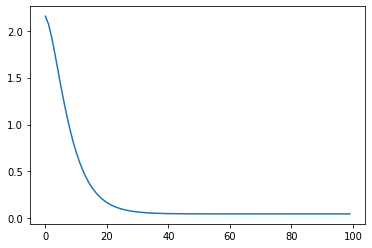

In [ ]:
#loss per iteration
plt.plot(losses)

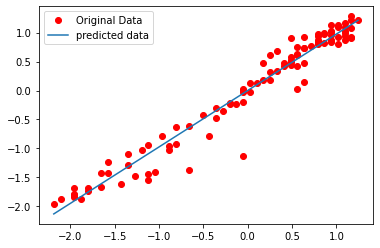

In [ ]:
#prediction
predicted=model(torch.from_numpy(X)).detach().numpy()
plt.plot(X,Y,'ro',label='Original Data')
plt.plot(X,predicted,label='predicted data')
plt.legend()
plt.show()

In [ ]:
#what does this mean?
w=model.weight.data.numpy()
print(w)

[[0.9759745]]


In [ ]:
a=w[0,0]*sy/sx

In [ ]:
a

0.35096656285166006

In [ ]:
print('Time to double:',np.log(2)/a)

Time to double: 1.9749664324943448
